In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/amritam/Documents/Bits Pilani/sem2/IDS/Assignment/googleplaystore.csv")

In [3]:
#Analysis of first 5 apps data(EDA - what kind of data has been acquired)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#Analysis of last 5 apps data(EDA - what kind of data has been acquired)
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
#Analysis of total number of apps and its attribute in one go
data.shape

(10841, 13)

In [6]:
#Analysis of data in each column to check if they have meaningful data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
#Analysis of Rating column wrt its aggregation, to check if the data is deviated much or not
data['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [8]:
##to find the skewness of the data
data.skew(axis = 'index')

Rating    0.595637
dtype: float64

In [9]:
##data processing if the data set hvaing NaN rows -- Imputation
df = data.dropna(how = 'all')
df.shape

(10841, 13)

In [10]:
##data processing for Rating column
##outlier removal-- Rating cannot be greater than 5 as looking at the data set ( inference from step 12 based on the max value)
##handling missing values with taking mean of the rating wrt category column -- Numerical Inputation
df.drop(df[df['Rating'] > 5].index, inplace = True)
df['Rating'] = df.groupby("Category").Rating.transform(lambda x: x.fillna(x.mean()))

In [11]:
## data cleaning result for Rating column
df.Rating.isna().sum()


0

In [12]:
##checking the number of non null columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


In [13]:
##data processing for Type column as above results shows 1 null value for the column
##handling missing values with taking mode of the entire column and putting it there
df['Type'] = df['Type'].fillna(data['Type'].mode()[0])

In [14]:
df.Type.isna().sum()

0

In [15]:
##Sixe of the dateframe
df.size

140920

In [16]:
(df.duplicated().value_counts()/data.shape[0])*100

False    95.535467
True      4.455309
dtype: float64

In [17]:
##removing duplicates
df.drop_duplicates(inplace=True) 

In [18]:
##checking the number of non null columns scross
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [19]:
##data cleaning per column --Installs
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].astype(int)


<ipython-input-19-961f5496b1d2>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Installs'] = df['Installs'].str.replace('+', '')


In [20]:
##data cleaning per column --Reviews
df['Reviews'] = df['Reviews'].astype(int)


In [21]:
##data cleaning per column --Size
df['Size'] = df['Size'].str.replace('+', '')
df['Size'] = df['Size'].str.replace('M', '000000')
df['Size'] = df['Size'].str.replace('K', '000')
df['Size'] = df['Size'].str.replace('k', '000')
df['Size'] = df['Size'].astype(str).str.replace('Varies with device','0')
df['Size'] = df['Size'].astype(float)

<ipython-input-21-58ec8d652efe>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Size'] = df['Size'].str.replace('+', '')


In [22]:
##data cleaning per column --Price
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = df['Price'].astype(float)

<ipython-input-22-d0788e1a6f72>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['Price'] = df['Price'].str.replace('$', '')


In [23]:
##checking the data type of each column if they can be used for further feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          10357 non-null  float64
 3   Reviews         10357 non-null  int32  
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  int32  
 6   Type            10357 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), int32(2), object(8)
memory usage: 1.0+ MB


In [24]:
##dropping out not so useful columns
df=df.drop(columns=['Current Ver', 'Android Ver'])

In [25]:
#Highted rated app
hr=df.groupby('App')['Rating'].sum()
hr.idxmax()

'ROBLOX'

In [26]:
##largest number of installed app 
hii=df.groupby(by='App')['Installs'].sum()
hii.index[hii.argmax()]

'Subway Surfers'

In [27]:
##highest installion with respect to Category
hc=df.groupby(by='Category')['Installs'].sum()
hc.index[hc.argmax()]

'GAME'

In [28]:
##app having highest reviews
hr=df.groupby(by='App')['Reviews'].sum()
hr.index[hr.argmax()]

'Instagram'

In [29]:
##app having largest size
hs=df.groupby(by='App')['Size'].sum()
hs.index[hs.argmax()]

'ROBLOX'

In [30]:
##importing libraries at once
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


In [31]:
## category feature selection - Type, Content Ratng, Genres
df2=df[['App','Category','Rating','Reviews','Size','Installs','Type','Price','Content Rating','Genres']]
df2.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity


In [32]:
##label encoding on Type
df2['Type']=np.where(df2['Type']=="Free",0,1)

<ipython-input-32-086a8978b1c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Type']=np.where(df2['Type']=="Free",0,1)


In [33]:
##label encoding on Category
ordinal_label={k: i for i, k in enumerate(df2['Category'].unique(),0)}

In [34]:
df2['Category']=df2['Category'].map(ordinal_label)

<ipython-input-34-7049d860c54c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Category']=df2['Category'].map(ordinal_label)


In [35]:
##label encoding on App
ordinal_label1={k: i for i, k in enumerate(df2['App'].unique(),0)}
df2['App']=df2['App'].map(ordinal_label1)

<ipython-input-35-59d57bc4c37a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['App']=df2['App'].map(ordinal_label1)


In [36]:
##label encoding on Genres
ordinal_label2={k: i for i, k in enumerate(df2['Genres'].unique(),0)}
df2['Genres']=df2['Genres'].map(ordinal_label2)

<ipython-input-36-b350fccb0a93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Genres']=df2['Genres'].map(ordinal_label2)


In [37]:
##label encoding on Rating
ordinal_label3={k: i for i, k in enumerate(df2['Rating'].unique(),0)}
df2['Rating']=df2['Rating'].map(ordinal_label3)

<ipython-input-37-edfae47832cb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Rating']=df2['Rating'].map(ordinal_label3)


In [38]:
##label encoding on Content Rating
ordinal_label4={k: i for i, k in enumerate(df2['Content Rating'].unique(),0)}
df2['Content Rating']=df2['Content Rating'].map(ordinal_label4)

<ipython-input-38-ba23b0bdcc92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Content Rating']=df2['Content Rating'].map(ordinal_label4)


In [40]:
##Size of processed data set
df2.size

103570

In [41]:
## trgin split to ovoid overfitting
y= df2.Installs
x=df2.drop('Installs',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [42]:
##Checking the training data set
X_train

,App,Category,Rating,Reviews,Size,Type,Price,Content Rating,Genres
7055,864,11,3,64983,39000000.0,0,0.0,0,24
3051,2382,23,12,1660,4.7,0,0.0,0,39
3604,2847,28,12,7505,9.1,0,0.0,0,95
10215,9045,22,6,742,1.8,0,0.0,0,88
3316,2588,25,0,88675,9.6,0,0.0,0,91
...,...,...,...,...,...,...,...,...,...
3311,2583,25,4,16395,0.0,0,0.0,0,91
8284,7206,32,19,59,1.3,0,0.0,0,103
1053,842,11,7,278082,70000000.0,0,0.0,0,24
5649,4668,20,12,5369,63000000.0,0,0.0,1,86


In [42]:
##check if any null value exists in trained dataset
X_train.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [45]:
## mutual info feature selection technique
from sklearn.feature_selection import mutual_info_regression
mutual_info=mutual_info_regression(X_train, y_train)
mutual_info

array([0.519621  , 0.12302295, 0.37708634, 1.39960852, 0.16841475,
       0.0465879 , 0.04489841, 0.01472398, 0.12200189])

In [46]:
##corelation results of other features with respect to Installs feature in decreasing order
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Reviews           1.399609
App               0.519621
Rating            0.377086
Size              0.168415
Category          0.123023
Genres            0.122002
Type              0.046588
Price             0.044898
Content Rating    0.014724
dtype: float64

<AxesSubplot:>

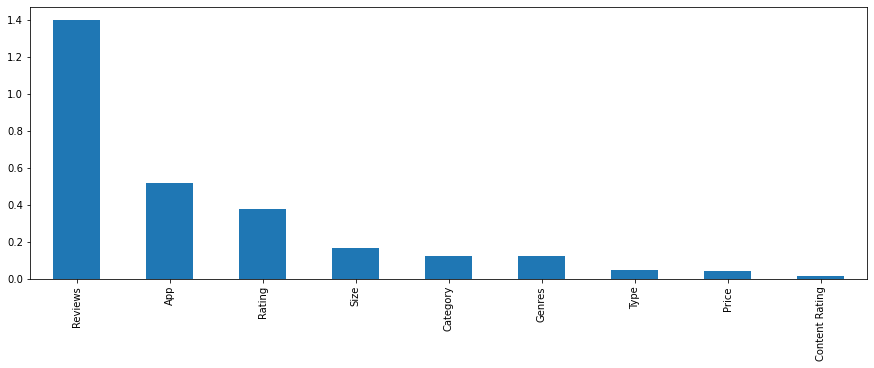

In [47]:
##graph plotting for the above result
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [48]:
##importing libraries to get the hifhest percentile data
from sklearn.feature_selection import SelectPercentile

In [49]:
##top 5 features
top = SelectPercentile(mutual_info_regression, percentile=60)
top.fit(X_train,y_train)
X_train.columns[top.get_support()]

Index(['App', 'Rating', 'Reviews', 'Size', 'Genres'], dtype='object')

<AxesSubplot:>

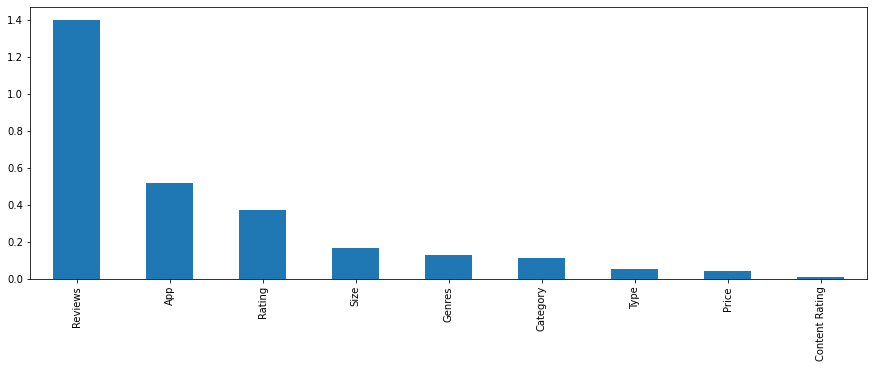

In [50]:
mutual_info1=mutual_info_regression(X_train, y_train)
mutual_info1=pd.Series(mutual_info1)
mutual_info1.index=X_train.columns
mutual_info1.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [51]:
##top 6 features
top = SelectPercentile(mutual_info_regression, percentile=70)
top.fit(X_train,y_train)
X_train.columns[top.get_support()]

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Genres'], dtype='object')

In [52]:
##top 8 features
top = SelectPercentile(mutual_info_regression, percentile=90)
top.fit(X_train,y_train)
X_train.columns[top.get_support()]

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [53]:
##perform chi square test
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)


In [54]:
f_p_values

(array([3.18287399e+06, 2.04746633e+02, 7.00833584e+04, 6.10151843e+10,
        1.13006595e+10, 5.21878013e+02, 5.20168488e+04, 3.57295976e+02,
        1.28038244e+03]),
 array([0.00000000e+000, 3.86405635e-033, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 1.42535506e-098, 0.00000000e+000, 3.16651221e-064,
        5.64029114e-260]))

In [55]:
f_values=pd.Series(f_p_values[0])
f_values.index=X_train.columns
f_values

App               3.182874e+06
Category          2.047466e+02
Rating            7.008336e+04
Reviews           6.101518e+10
Size              1.130066e+10
Type              5.218780e+02
Price             5.201685e+04
Content Rating    3.572960e+02
Genres            1.280382e+03
dtype: float64

In [56]:
## top features with  correlation with installs column in decreasing order
f_values.sort_values(ascending=False)

Reviews           6.101518e+10
Size              1.130066e+10
App               3.182874e+06
Rating            7.008336e+04
Price             5.201685e+04
Genres            1.280382e+03
Type              5.218780e+02
Content Rating    3.572960e+02
Category          2.047466e+02
dtype: float64

# Logistic Regression

In [57]:
##logistick regression ML
from sklearn.linear_model import LogisticRegression

In [58]:
y= df2.Installs
x=df2.drop('Installs',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [59]:
## Feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
## Create an instance of LogisticRegression classifier lbfgs
lr = LogisticRegression(C=100.0, random_state=1, solver='liblinear', multi_class='ovr')
 
## Fit the model
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1,
                   solver='liblinear')

In [61]:
from sklearn import metrics
from sklearn import datasets
# Create the predictions
Y_predict = lr.predict(X_test_std)
 
# Use metrics.accuracy_score to measure the score
print("LogisticRegression Accuracy %.3f" %metrics.accuracy_score(y_test, Y_predict))

LogisticRegression Accuracy 0.328


# Decision Tree Classifier

In [62]:
from sklearn import metrics
from sklearn import datasets
from sklearn import tree

In [63]:
## trgin split to ovoid overfitting
y= df2.Installs
x=df2.drop('Installs',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [64]:
model=tree.DecisionTreeClassifier()

In [65]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [66]:
model.score(X_train,y_train)

1.0

In [67]:
y_pred=model.predict(X_test)

In [68]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.4657335907335907


# Linear Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
y= df2.Installs
x=df2.drop('Installs',axis=1)
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(x,y,test_size=0.2,random_state=1)

In [71]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train1=sc.fit_transform(X_train1)
x_test1=sc.transform(X_test1)

In [72]:
##model creation and fitting 
model = LinearRegression()
model.fit(x_train1, y_train1)

LinearRegression()

In [73]:
##model evaluation
r_sq = model.score(x_train1, y_train1)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.406132913413664


In [74]:
##model evaluation
r_sq = model.score(x_test1, y_test1)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.42864974332976535


In [75]:
predictions = model.predict(x_test1) 

In [76]:
print(predictions,sep='\n')

[ 1367390.88007745  5432677.46737208  8580291.79414247 ...
 -5990697.42660497  4342521.98851705 -4440131.33413624]
